## MLOPS ZoomCamp - Week 1
- [Questions](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/01-intro/homework.md)

In [5]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Q1. Downloading the data



In [ ]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet -O ../data/yellow_tripdata_2022-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet -O ../data/yellow_tripdata_2022-02.parquet

In [7]:
df = pd.read_parquet('../data/yellow_tripdata_2022-01.parquet')

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [9]:
len(df.columns)

19

### Q2. Computing duration

In [10]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [11]:
df.duration.mean()

14.212202918831741

In [12]:
df.duration.std()

46.44530513776802

### Q3. Dropping outliers

In [13]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

98.27547930522405

In [14]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
df.shape

### Q4. One-hot encoding

In [15]:
categorical = ['PULocationID', 'DOLocationID']

In [16]:
df[categorical] = df[categorical].astype(str)

In [17]:
train_dicts = df[categorical].to_dict(orient='records')

In [18]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (2421440, 515)


### Q5. Training a model

In [20]:
target = 'duration'
y_train = df[target].values

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 6.986190833327483


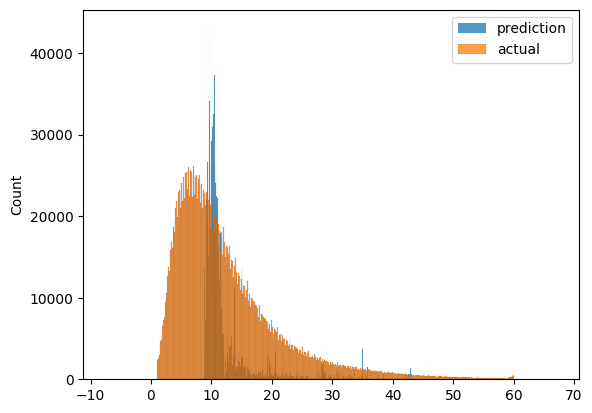

In [22]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

### Q6. Evaluating the model

In [23]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [25]:
df_val = read_data('../data/yellow_tripdata_2022-02.parquet')

In [26]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [27]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [28]:
y_pred = lr.predict(X_val)

In [29]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 6.986190833327483
